In [10]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [11]:
df1 =  pd.read_csv('../data/2d-03_10_2018.csv')



In [12]:
df_r =  df1[df1['is_source']==True]
df_r = df_r.rename(index=str,columns={'new_dir':'folder'})

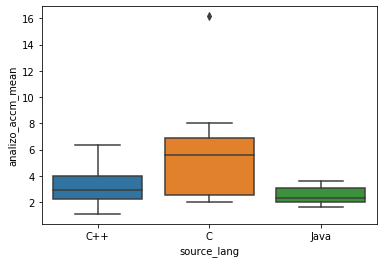

In [13]:
sns.boxplot(data=df_r,x='source_lang',y='analizo_accm_mean')

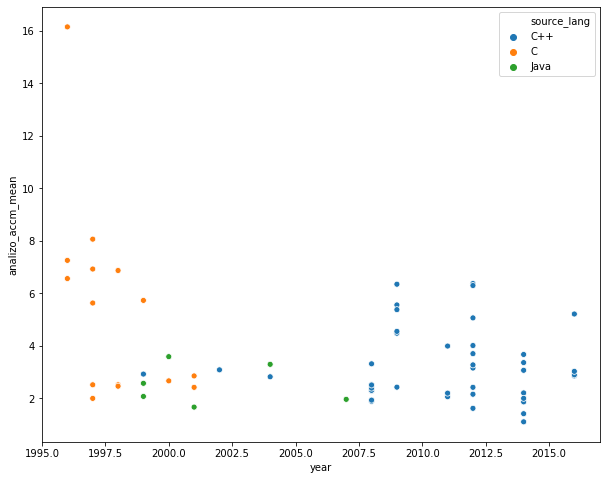

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_r,x='year',y='analizo_accm_mean',hue='source_lang')

In [15]:
df_r.groupby(['competition','year','source_lang']).agg(['count','mean']).sort_values(['competition','year'])['analizo_accm_mean']

count      mean
competition year source_lang                 
ChinaOpens  2012 C++              3  2.684857
JapanOpens  2008 C++              9  2.384010
            2009 C++              5  4.625367
            2011 C++              3  2.752235
LARC        2014 C++              5  2.470775
PRIMA       2009 C++              3  4.867042
WorldCup    1996 C                3  9.988174
            1997 C                5  5.027972
            1998 C                3  3.950740
            1999 C                1  5.731300
                 C++              1  2.925903
                 Java             2  2.324969
            2000 C                1  2.667702
                 Java             1  3.589202
            2001 C                2  2.638408
                 Java             1  1.668115
            2002 C++              1  3.087016
            2004 C++              1  2.823408
                 Java             1  3.297402
            2007 Java             1  1.964022
            2012 C++              7  4.290406
            2014 C++              3  2.118009
            2016 C++              4  3.499603

In [20]:
metrics = ['mean','max','sum']

In [35]:
df_mertics = df_r[[a for a in df_r.columns if metrics[0] in a]]
out_folder= '../fig/metrics_correlation'
os.makedirs(out_folder,exist_ok=True)

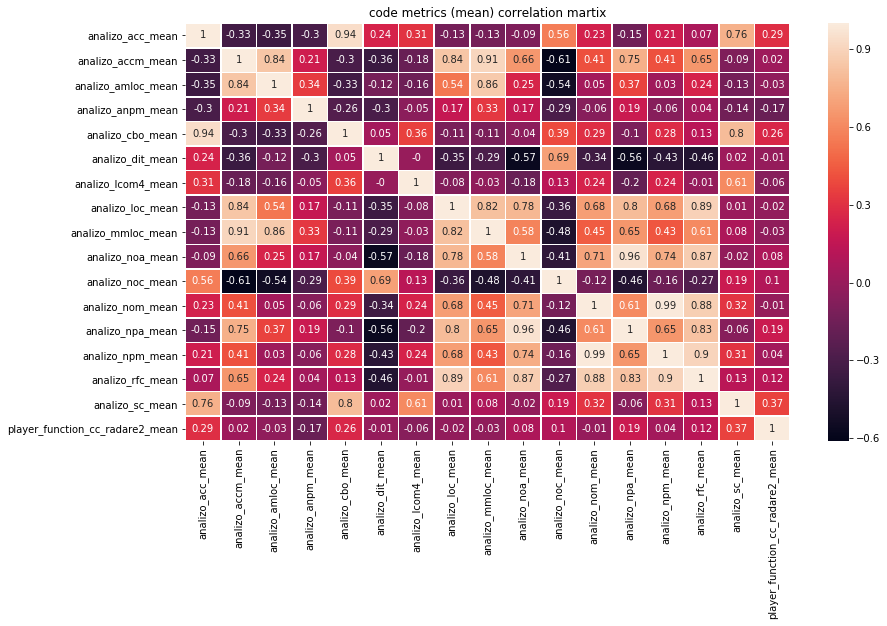

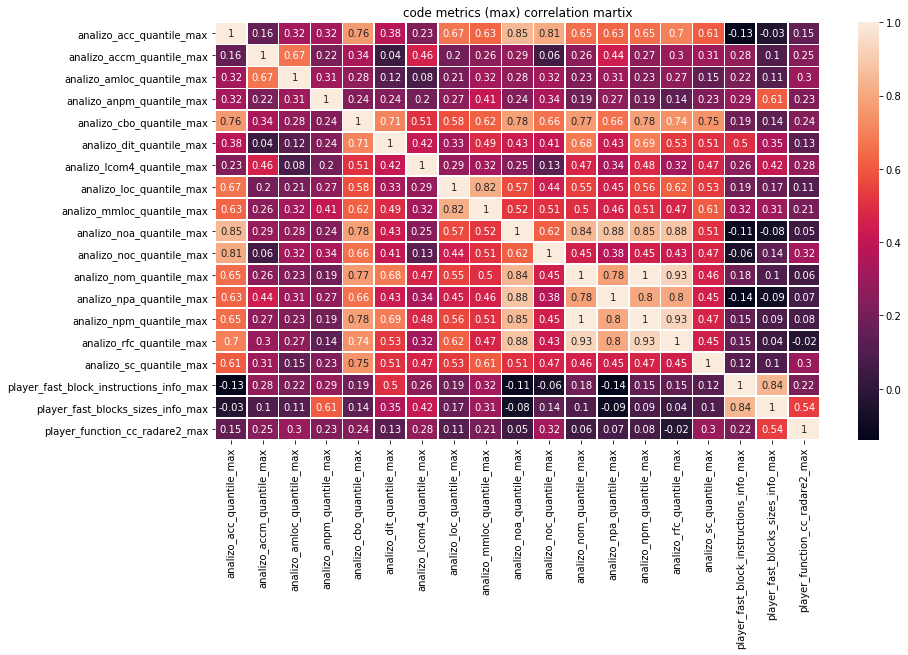

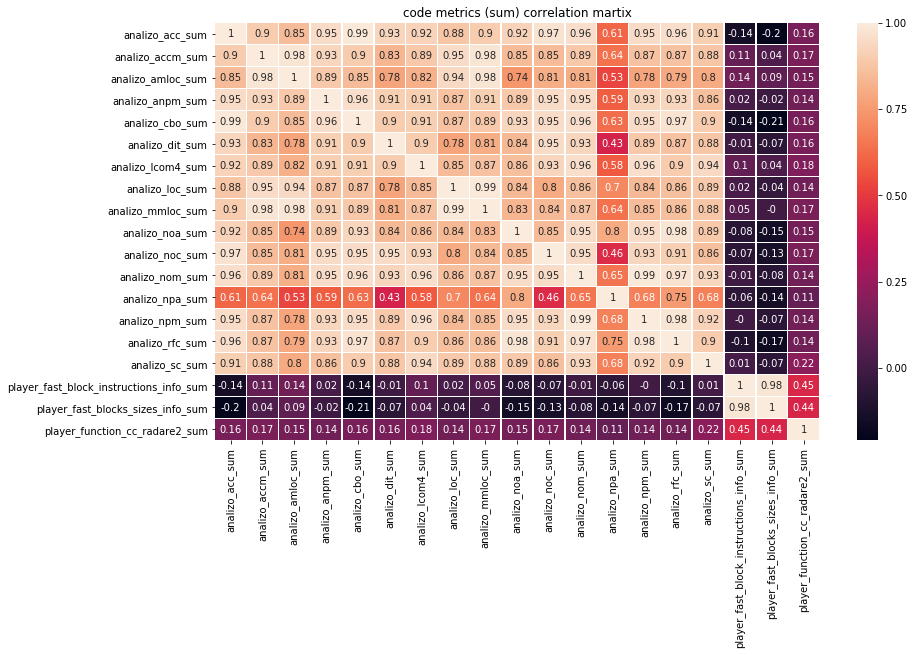

In [46]:
for metric in metrics:
    df_mertics = df_r[[a for a in df_r.columns if re.match(r'.*{}'.format(metric),a)]]
    f, ax = plt.subplots(figsize=(15,10))
    plt.gcf().subplots_adjust(bottom=0.30,left=0.2)
    sns_plot = sns.heatmap(df_mertics.corr().round(2),annot=True,linewidths=0.5)
    sns_plot.set_title(
        'code metrics ({}) correlation martix'.format(metric))
    sns_plot.figure.savefig(out_folder+"/"+"correlation_metrics_{}.eps".format(metric),format='eps')


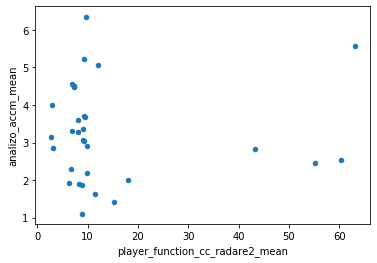

In [22]:
df1.plot.scatter(x='player_function_cc_radare2_mean',y='analizo_accm_mean')